In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
# Data Preprocessing
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [6]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [8]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [9]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [11]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:

# Feature scalling is must to converage will happen quickly
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
#build an ANN Model
import keras
from keras.models import Sequential  # for all deep learning neural network
from keras.layers import Dense #for hidden layer
from keras.layers import LeakyReLU,PReLU,ELU # for Activation function
from keras. layers import Dropout  # to avoid overfitting---> if neural network is too deep we usually used this

In [14]:
#initialize the ANN model
classifier=Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
# input_dim= no fo features in training
# We know in hidden layer we generally used Relu activation function to avoid vanishing gradient problem
# With Relu Activation function----> generally he_unifrom and he_normal work very well
# In final layer/ output layer----> we generally used sigmoid Activation fucntion, and weight initilization glorot_uniform works
# pretty well.

#classifier.add(dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)


Complining the ANN
optimizer: Which optimizer to use in order to minimize the loss function.
loss: The loss function to minimize. Since we’re building a binary 0/1 classifier, the loss function to minimize is binary_crossentropy
metrics: Which metric to report statistics on, for classification problems we set this as accuracy.
We mostly prefer optimizer----> Adam
Loss function for Binary----> binary_crossentropy
loss function for multiple class -----> categorical_crossentropy

In [24]:
# compile ANN
classifier.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [35]:

# fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8609 - loss: 0.3336 - val_accuracy: 0.8508 - val_loss: 0.3590
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8632 - loss: 0.3236 - val_accuracy: 0.8519 - val_loss: 0.3593
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8604 - loss: 0.3279 - val_accuracy: 0.8531 - val_loss: 0.3589
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8640 - loss: 0.3264 - val_accuracy: 0.8516 - val_loss: 0.3600
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8714 - loss: 0.3145 - val_accuracy: 0.8535 - val_loss: 0.3596
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8650 - loss: 0.3223 - val_accuracy: 0.8535 - val_loss: 0.3581
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8678 - loss: 0.3216 - val_accuracy: 0.8542 - val_loss: 0.3590
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8610 - loss: 0.3302 - val_accu

In [36]:
# predicting the model
y_pred= classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Printing the confusion matrix, accuracy, and classification report

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1495  100]
 [ 191  214]]
The accuracy of the model is 0.8545
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.53      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


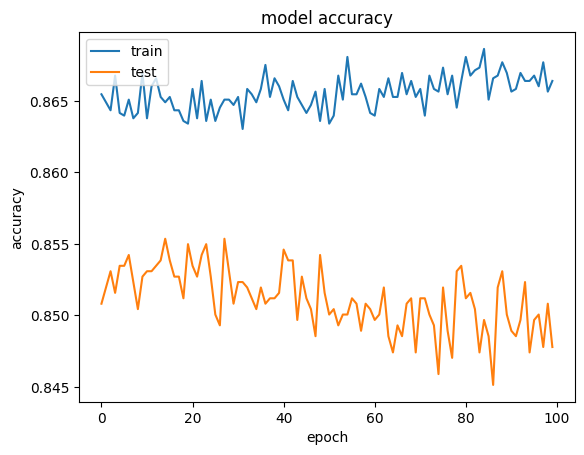

In [38]:

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

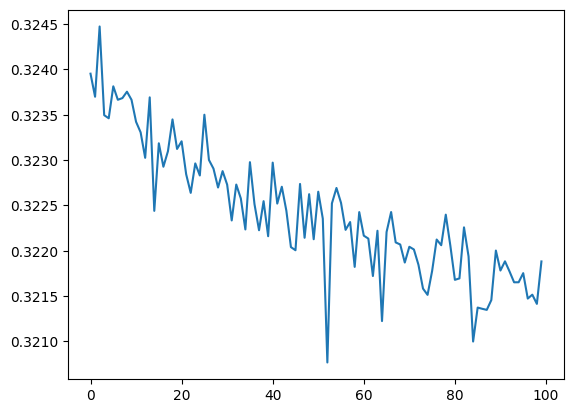

In [39]:
plt.plot(model_history.history['loss'])

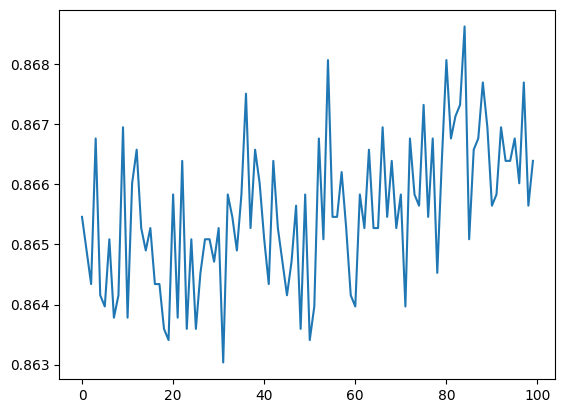

In [40]:
plt.plot(model_history.history['accuracy'])

In [51]:
result = classifier.predict(sc.transform([[600, 50, 3, 30000, 2, 1, 1, 500000, 1, 0, 0]]))
print(result)

if result > 0.5:
    print("Customer will leave the bank in the future")
else:
    print("Customer will stay with the bank")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.06351101]]
Customer will stay with the bank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
